<span style="color:lightblue">**MPG data analysis**<span/>

In [61]:
import seaborn as sns
mpg = sns.load_dataset("mpg")

<span style="color:lightblue">**Relationship between horsepower and fuel economy**<span/>
###### *As horsepower increases, mpg decreases*

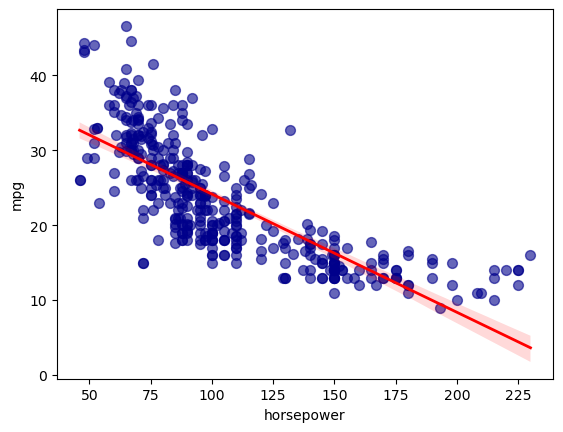

In [62]:
scatter_plot = sns.regplot(x='horsepower', y='mpg', data=mpg, 
                          scatter_kws={'alpha':0.6, 's':50, 'color':'darkblue'},
                          line_kws={'color':'red', 'linewidth':2})

<span style="color:lightblue">**Fuel economy by country of origin**<span/>
###### *It is shown that the highest mpg by origin is Japan, followed closely by Europe. I have also created a summary graph showing the mean mpg for each country*

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [64]:
country_of_origin = mpg.groupby('origin').agg({
    'mpg': ['mean', 'median', 'std', 'min', 'max', 'count']
}).round(2)

In [65]:
country_of_origin.columns = ['Mean MPG', 'Median MPG', 'Std Dev', 'Min MPG', 'Max MPG', 'Count']

In [66]:
country_of_origin = country_of_origin.reset_index()

In [67]:
table = country_of_origin.style.set_caption("Fuel Economy by Country of Origin")\
    .background_gradient(subset=['Mean MPG', 'Median MPG'], cmap='YlGn')\
    .background_gradient(subset=['Std Dev'], cmap='Reds_r')\
    .bar(subset=['Count'], color='#5fbed7')\
    .format({
        'Mean MPG': '{:.2f}',
        'Median MPG': '{:.2f}',
        'Std Dev': '{:.2f}',
        'Min MPG': '{:.1f}',
        'Max MPG': '{:.1f}',
        'Count': '{:.0f}'
    })

In [68]:
display(table)

,origin,Mean MPG,Median MPG,Std Dev,Min MPG,Max MPG,Count
0,europe,27.89,26.50,6.72,16.2,44.3,70
1,japan,30.45,31.60,6.09,18.0,46.6,79
2,usa,20.08,18.50,6.40,9.0,39.0,249


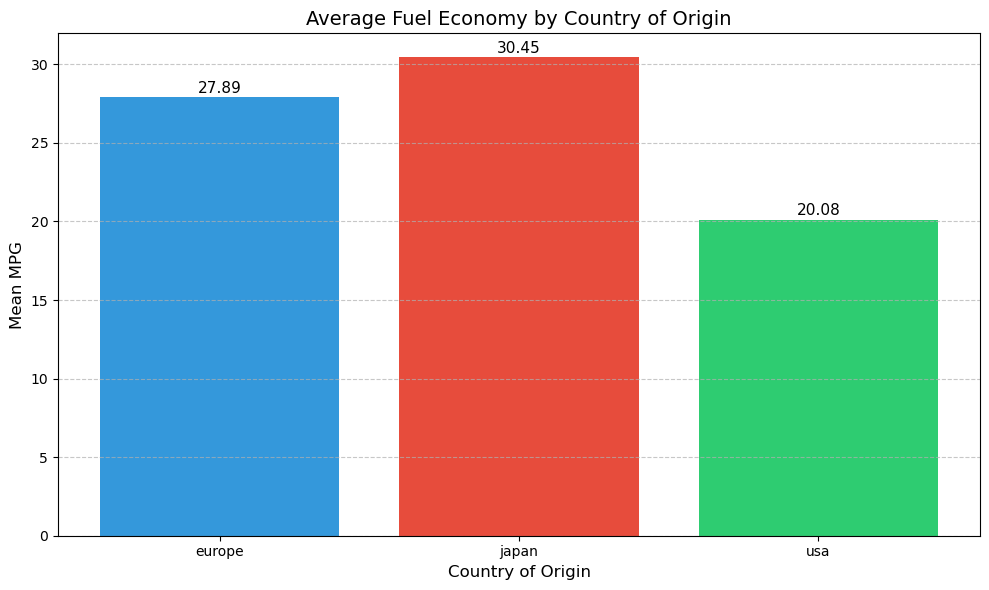

In [76]:
plt.figure(figsize=(10, 6))
bars = plt.bar(country_of_origin['origin'], country_of_origin['Mean MPG'], color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Average Fuel Economy by Country of Origin', fontsize=14)
plt.xlabel('Country of Origin', fontsize=12)
plt.ylabel('Mean MPG', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.2f}', ha='center', fontsize=11)

plt.tight_layout()

<span style="color:lightblue">**Fuel economy over time**</span>
###### mpg has been increased over time with noticeable drops between 1971-1973, 1974-1975, and 1980-1981. It is also worth noting that there was a drastic increase between 1979 and 1980.

Text(0.5, 1.0, 'Fuel economy over time')

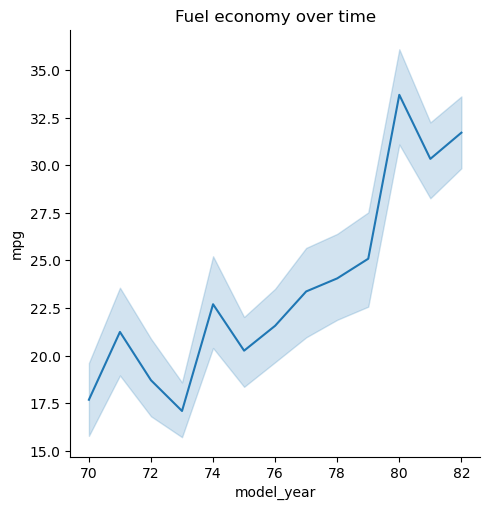

In [77]:
sns.relplot(
    data=mpg,
    x="model_year", y="mpg", kind="line")
plt.title("Fuel economy over time")

<span style="color:lightblue">**Visulizing the relationship of mpg and horsepower based on the number of cylinders**<span/>
###### *It is shown that as the cylinder count increases the horsepower does as well, but the vehicles mpg decrease as a result.*

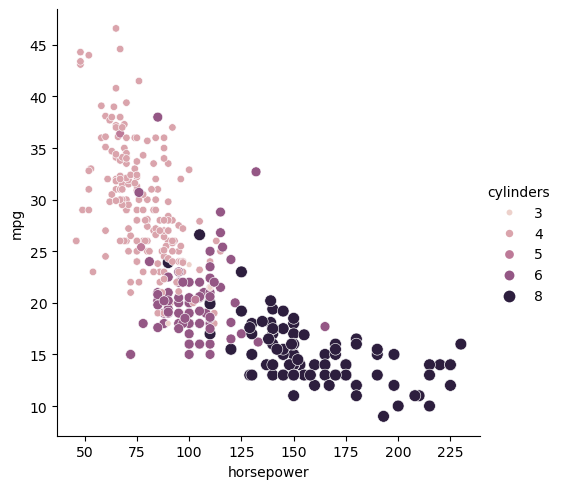

In [78]:
sns.relplot(x="horsepower", y="mpg", data=mpg, kind="scatter", size="cylinders", hue="cylinders")

<span style="color:lightblue">**Visualizing the relationship between weight and mpg**<span/>
###### *As weight increases, mpg decreases*

Text(0, 0.5, 'Miles Per Gallon (MPG)')

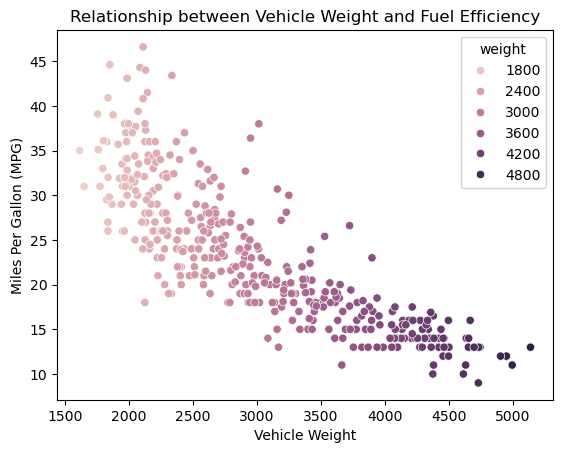

In [79]:
data=("mpg")
sns.scatterplot(x="weight", y="mpg", data=mpg, hue="weight")
plt.title("Relationship between Vehicle Weight and Fuel Efficiency")
plt.xlabel("Vehicle Weight")
plt.ylabel("Miles Per Gallon (MPG)")